# Código de recomendação por similaridade de cosseno

In [2]:
import numpy as np # importa a biblioteca para realizar operações com os vetores
import pandas as pd # biblioteca de estrutura de dados tabular
from sklearn.metrics.pairwise import cosine_similarity # biblioteca de similaridade de cosseno
import matplotlib.pyplot as plt # biblioteca gráfica
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Biblioteca para worldcloud
import nltk # Biblioteca de processamento de linguagem natural
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction import text # bib. para converter palavras em matrizes

url = "https://raw.githubusercontent.com/penchel/recdeeplearning/main/Jobs/Jobs/jobs.csv"
data = pd.read_csv(url) # lendo o arquivo
data = data.drop("Unnamed: 0",axis=1) # eliminando coluna vazia
print(data.head()) # printar os 5 primeiros documentos de "data"
data.isnull().sum() # sinaliza a existencia de espaços ausentes

feature = data["Key Skills"].tolist() # converte a coluna "Key Skills" para uma lista
tfidf = text.TfidfVectorizer( stop_words="english") # instancia um objeto do módulo tfidVectorizer considerando stop words em ingles
tfidf_matrix = tfidf.fit_transform(feature) # transforma a lista feature em uma matriz
similarity = cosine_similarity(tfidf_matrix) # Converte a matriz original em uma matriz que armazena cada a similaridade de cada registro por linha em relação aos outros registros

indices = pd.Series(data.index, index=data["Job Title"]).drop_duplicates() # armazena os indices de cada título de trabalho em uma estrutura Series excluindo duplicatas


                     Job Salary Job Experience Required  \
0   Not Disclosed by Recruiter               5 - 10 yrs   
1   Not Disclosed by Recruiter                2 - 5 yrs   
2   Not Disclosed by Recruiter                0 - 1 yrs   
3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawarehousing   
4                        Programming & Design   

             

In [6]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title] #busca o indice numérico baseado no nome do trabalho
    similarity_scores = list(enumerate(similarity[index])) # transforma os valores da linha da matriz de similaridade correspondente ao indice em uma lista
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True) #ordena essa lista
    similarity_scores = similarity_scores[0:5] # filtra essa lista para os valores dos indices de zero a cinco
    newsindices = [i[0] for i in similarity_scores] # filtra para aparecer só os indices
    return data[['Key Skills']].iloc[newsindices] # projeta as colunas entre colchetes, filtrando pelos indices

print(jobs_recommendation("Software Developer"))

                                             Key Skills
6249   Networking| Printing| Aerospace| Raw material...
6248   PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...
6247   Data analysis| Investment banking| Financial ...
6246   Coding| Wordpress| Commerce| HTML| Troublesho...
6245   client servicing| client support| background ...


# Código inicial de redes neurais (Hello, world!)

In [8]:
import tensorflow as tf
tf.__version__
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential() # cria o modelo sequencial
model.add(tf.keras.layers.Flatten()) # faz o 'flatten', gera os 784 neurônios iniciais, 28 x 28 = 784
model.add(tf.keras.layers.Dense(16,activation=tf.nn.relu)) # adiciona camada com 16 neurônios
model.add(tf.keras.layers.Dense(16,activation=tf.nn.relu)) # adiciona camada com 16 neurônios
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # adiciona camada final com 10 neurônios

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=1) # treina o modelo depois de compilado


Epoch 1/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - accuracy: 0.8595 - loss: 0.4656
Epoch 2/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - accuracy: 0.9397 - loss: 0.2026
Epoch 3/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - accuracy: 0.9472 - loss: 0.1762


Ver a imagem:

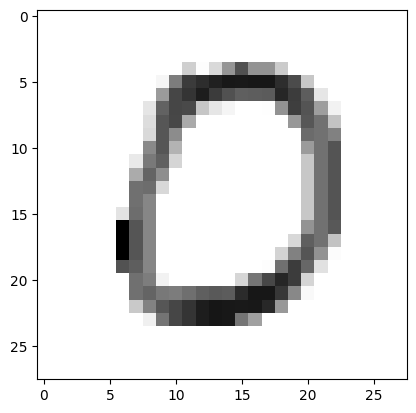

0


In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_test[10], cmap = plt.cm.binary)
plt.show()
print(y_test[10])

In [10]:
imagem_normalizada = tf.keras.utils.normalize(x_test[10], axis = 1)
imagem_entrada = np.expand_dims(imagem_normalizada, axis=0)
previsao = model.predict(imagem_entrada)
numero = np.argmax(previsao)
print(previsao)
print(numero)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[9.9945003e-01 6.1459379e-11 1.6996839e-04 6.6580733e-06 2.6707649e-09
  1.2992900e-04 1.6939167e-04 2.5021075e-06 6.1114028e-05 1.0537420e-05]]
0
